<a href="https://colab.research.google.com/github/premcodeexplorer/ML-Learning/blob/main/ml_chapter2_housingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import tarfile
from six.moves import urllib


In [10]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [11]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
  os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [12]:
# this function returns a dataframe object containing of all data
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [14]:
fetch_housing_data()

In [15]:
housing = load_housing_data();
housing.head()  # top 5 rows of the data each row represents one district and there are 10 attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.info()  # by using info function we get a quick description of the data like no of rows, attribute types and no of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## here after using the housing.info() we came to know with the following facts that are  
##### 1.   RangeIndex: that is the 20640 this means there are 20640 instance in the dataset
##### 2.   second is about the attributes that all the attributes except "ocean_proximity" are numerical and it may be categorical attribute   here we can find out the catogories exist here by and how many district belongs to which catogory by the "values.count()" methode and the attribute total_bedrooms have the value 20433 so it contains 207 null values that is 207 districts do not have this attribute



In [17]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


##### The ocean_proximity column in your dataset has 5 unique categories (also called values or levels if you're referring to categorical data).

##### Each number next to the category indicates how many districts (rows) in the dataset fall under that category.

In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


housing.describe gives you the summary about the numrical attributes like count ,mean of that attribute also std , min , max , 25%,50%,75% etc

1.   her null values are ignored , i.e no of bedrooms is 20433
2.   the std shows how dispersed the values are
3.   the 25%,50%,75% shows the percentile:
     the percentile shows the value bellow which the percentage of data falls i.e here the 25% of the housing_median_age is 18 that means 25% of the data has the median_age <= 18




---



# Plot a histogram for each numerical attribute

1.   another quick way to get a feel of the data is to plot a histogram for the each attribute
2.   A histogram shows the no of instances on y axis and the values in range on the x axis



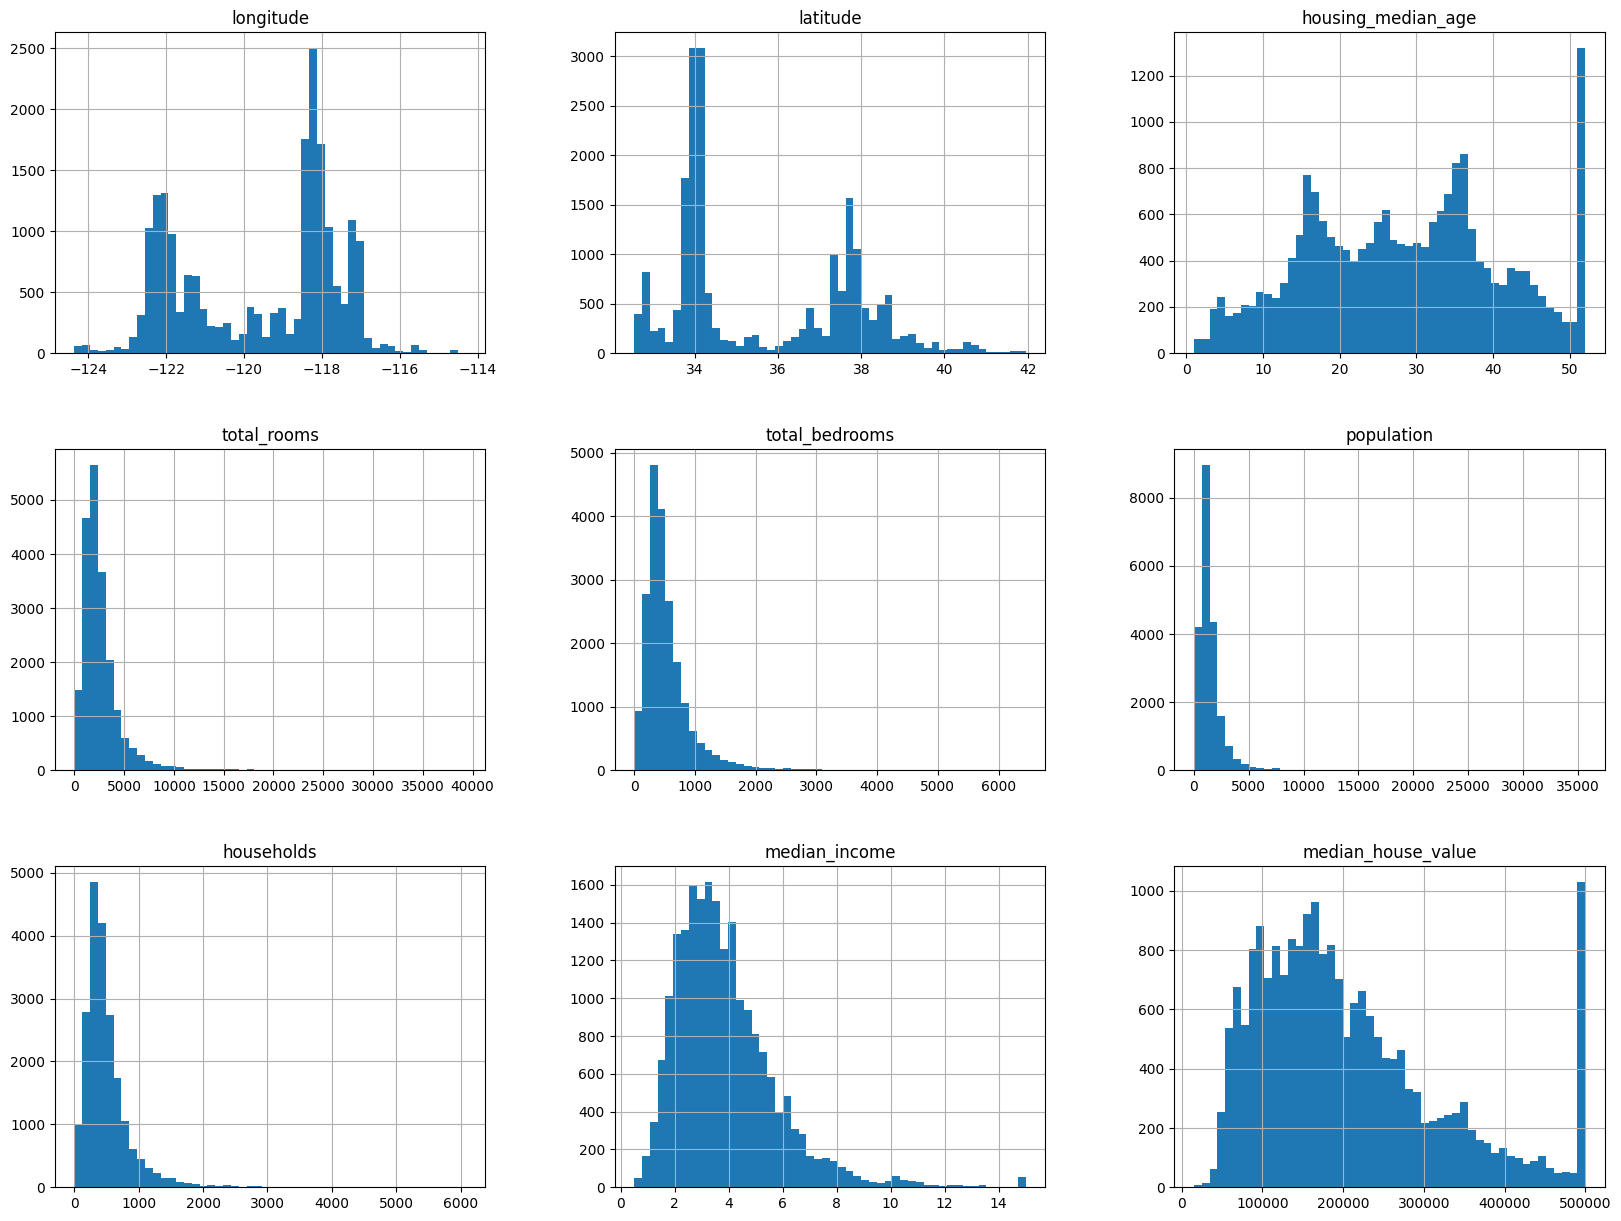

In [25]:
import matplotlib.pyplot  as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

1. Median Income is Scaled and Capped
2. Other columns are also capped
housing_median_age and median_house_value were also capped.

Ask your client team:
“Do you care about house values above $500,000?”

If they say:
Yes, then:
Option A: Try to collect the real values (not capped) from the source. ,
Option B: Remove these capped rows from training/testing data
3.  Features have different scales
Some columns go from 0–15 (like income), some from 1–52 (like age), some from 0–500000 (like house value).Later, you will do feature scaling to bring all values to the same scale — for example, using StandardScaler or MinMaxScaler.
4. 4. Tail-heavy Histograms (Right Skewed)

# Creat a Test Set

It might feel strange to set aside a test set early on — before choosing any algorithm or exploring the data deeply.
But this is actually the right thing to do.

Because our brain is very good at spotting patterns — even when those patterns are just noise.
So if you look at the test set too early, you might accidentally:
“Learn from the test set.”
And then our final model might perform well on that test set just by luck, not because it's truly generalizing well.

### 🧠 This is called data snooping bias

🔁 What is it?
You “snoop” (peek) at the test data, and your choices (models, preprocessing, hyperparameters) are influenced by what you saw.

➡️ So, even though you're not training on it directly, you're still cheating a little bit.





------

Creating a test set is theoretically quite simple: just pick some instances randomly,
typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [26]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))  # that is the indices of rows are shuffled so that they are randomly mixed befor splitting
  test_set_size = int(len(data) * test_ratio)     # calculates the size of how many rows should be there in the test set acc to the ratio
  test_indices = shuffled_indices[:test_set_size] # slice i.e [start:stop:set]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices] , data.iloc[test_indices] # iloc is used to return the actual rows not just the indices


In [32]:
train_set,test_set = split_train_test(housing,0.2)
len(train_set)


16512

In [33]:
len(test_set)

4128

well this methode of spliting the data set works but it is not perfect as it will genrate a different test set over time and the machine will come to know or will be inrtoduced to the complete data set which we want to avoid

Solution is to save the test set in the first run and load it in subsequent runs
another option is to set a random number genrator  seed before calling "np.random.permutation" so that it genrates the same shuffled indices

But both these solutions will break next time you fetch an updated dataset. A com‐
mon solution is to use each instance’s identifier to decide whether or not it should go
in the test set

For
example, you could compute a hash of each instance’s identifier and put that instance
in the test set if the hash is lower or equal to 20% of the maximum hash value. This
ensures that the test set will remain consistent across multiple runs, even if you
refresh the dataset. The new test set will contain 20% of the new instances, but it will
not contain any instance that was previously in the training set. Here is a possible
implementation:


In [37]:
from zlib import crc32 # crc32 is a hashing function from the zlib
def test_set_check(identifier,test_ratio):
  return crc32(np.int64(identifier)) & 0Xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id : test_set_check(id,test_ratio))
  return data.loc[~in_test_set],data.loc[in_test_set]


In [38]:
housing_with_id = housing.reset_index()  # Adds 'index' column as unique ID
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


#### Scikit-Learn provides a few functions to split datasets into multiple subsets in variousways. The simplest function is train_test_split, which does pretty much the samething as the function split_train_test defined earlier, with a couple of additional features



1.   First there is a random_state parameter that allows you to set the random
generator seed
2.   you can pass it multiple datasets
with an identical number of rows, and it will split them on the same indices (this is
very useful, for example, if you have a separate DataFrame for labels):




In [46]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)


### 🧠 The Problem:
You're told that median_income is very important in predicting median_house_value.
So when you split your dataset into training and test sets, you want to make sure the distribution of incomes is represented well in both sets.

 But here's the issue:
median_income is a continuous variable — meaning it can take many values (e.g., 1.75, 3.5, 5.9...).

If you just do a random split, it’s possible that:
Lower-income or higher-income values don’t show up well in the test set.
Then the model will perform poorly on those types in real-life data.

✅ Solution: Use Stratified Sampling
Stratified sampling means:
Split the dataset such that each income group (or stratum) is represented proportionally in both training and test sets.
But first, you need to create income categories from median_income using pd.cut().

✅ StratifiedShuffleSplit ensures:
20% of data goes into test set               
Each income category (1 to 5) appears in same percentage in both train and test


In [49]:
housing["income-cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])
# This creates a new column called income_cat, which categorizes the income levels.

In [50]:
housing["income-cat"].value_counts()


,count
income-cat,
3,7236
2,6581
4,3639
5,2362
1,822


<Axes: >

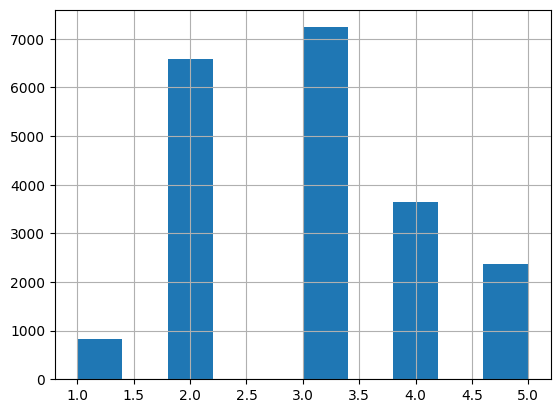

In [51]:
housing['income-cat'].hist()

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income-cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [55]:
strat_test_set["income-cat"].value_counts() / len(strat_test_set)

,count
income-cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [57]:
housing["income-cat"].value_counts() / len(housing)

,count
income-cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [59]:
def income_cat_proportions(data):
    return data["income-cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [60]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income-cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


As you can see, the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is quite skewed.
Now you should remove the income_cat attribute so the data is back to its original
state:


In [62]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income-cat", axis=1, inplace=True)

###Discover and Visualize the Data to Gain Insights

First, make sure you have put the test set aside and you are only exploring the train‐
ing set. Also, if the training set is very large, you may want to sample an exploration


In [63]:
housing = strat_test_set.copy()

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

<Axes: xlabel='latitude', ylabel='longitude'>

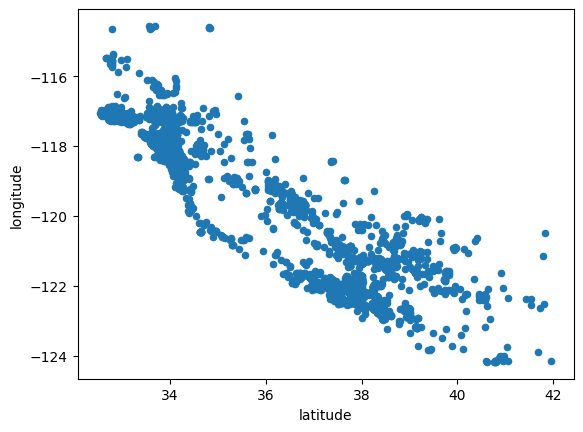

In [64]:
housing.plot(kind="scatter",x='latitude',y='longitude')

as it is hard to find out any pattern here from the plot it may be more easy by making alph = 0.1 to get high density

What does alpha=0.1 mean?
alpha ranges from 0.0 (fully transparent) to 1.0 (fully opaque).
So alpha=0.1 means each point is 90% transparent and only 10% visible.

<Axes: xlabel='latitude', ylabel='longitude'>

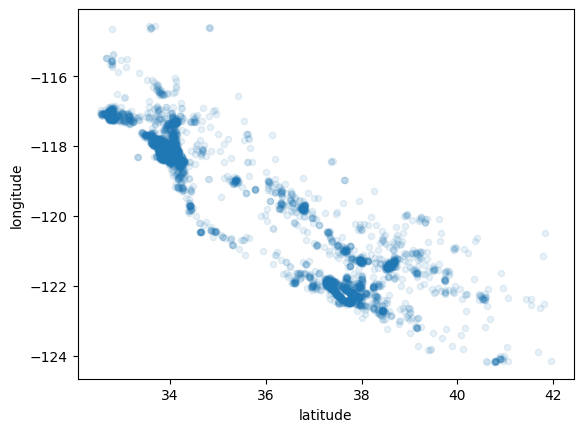

In [65]:
housing.plot(kind="scatter",x="latitude",y="longitude",alpha=0.1)

better visval of high density area

The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):16


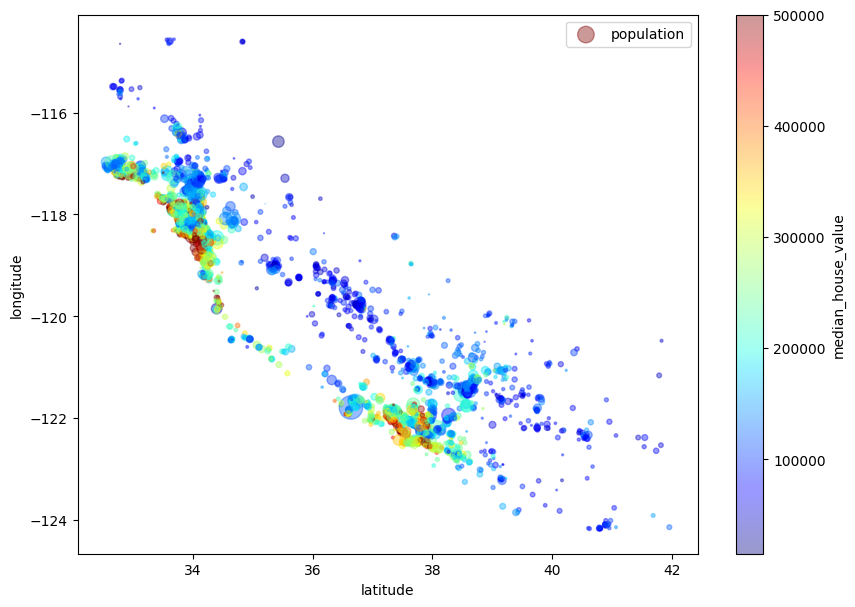

In [69]:
housing.plot(kind="scatter",x="latitude",y="longitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers



---



Since the dataset is not too large, you can easily compute the standard correlation
coecient (also called Pearson’s r) between every pair of attributes using the corr()
method